In [89]:
# Initial imports

import pandas as pd
from pathlib import Path
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report


In [90]:
# Load in the CSV data into a DataFrame
fraud_df = pd.read_csv(
    Path("./_data/card_transaction_data.csv")
)
# Display head and tail of the dataframe
fraud_df


,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,1/1/2019 0:00,3.890000e+13,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,42.1808,-112.2620,4154,Nature conservation officer,1/19/1962,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
1,1/1/2019 0:00,6.300000e+11,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,6/21/1978,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,1/1/2019 0:00,2.700000e+15,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",3/9/1988,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
3,1/1/2019 0:01,3.530000e+15,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,46.2306,-112.1138,1939,Patent attorney,1/12/1967,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,1/1/2019 0:03,3.760000e+14,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,38.4207,-79.4629,99,Dance movement psychotherapist,3/28/1986,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59555,2/4/2019 23:25,2.350000e+15,"fraud_Hauck, Dietrich and Funk",kids_pets,14.51,Justin,Gay,M,268 Hayes Rue Suite 811,Harborcreek,...,42.1767,-79.9416,2518,Event organiser,2/2/1946,aef320c4181260a5fde1faa308c3263c,1328397947,42.785397,-79.290164,0
59556,2/4/2019 23:26,4.650000e+18,"fraud_Swaniawski, Lowe and Robel",shopping_pos,3.76,Julia,Bell,F,576 House Crossroad,West Sayville,...,40.7320,-73.1000,4056,Film/video editor,6/25/1990,bffa9d7c3531c23caf805895fba4d10d,1328398010,40.252215,-72.691363,0
59557,2/4/2019 23:26,3.410000e+14,fraud_Skiles LLC,home,36.74,Mario,Johns,M,62130 Miller Square Suite 785,Brinson,...,30.9788,-84.7373,1461,"Engineer, broadcasting (operations)",9/8/1935,63a157e487768cece0b74abfc59d2af2,1328398013,31.480599,-85.145432,0
59558,2/4/2019 23:26,5.410000e+15,fraud_Kub-Heaney,health_fitness,115.30,Jeffrey,Krause,M,4742 Alexandria Mountain,New Franken,...,44.5592,-87.8235,4306,Art therapist,10/19/1989,730cf5285262a7071d0f764aa9d91cd9,1328398015,44.821099,-88.741285,0


In [91]:
# Review the data types associated with the columns
fraud_df.dtypes

trans_date_trans_time     object
cc_num                   float64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
unix_time                  int64
merch_lat                float64
merch_long               float64
is_fraud                   int64
dtype: object

In [92]:
# Drop the "trans_date_trans_time" column from the DataFrame
fraud_df = fraud_df.drop(
    columns=[
        "merchant","trans_date_trans_time","cc_num","first","last","street","lat","long","city_pop","job","trans_num","unix_time","merch_lat","merch_long"
        ]
).copy()

# Review the DataFrame
fraud_df

,category,amt,gender,city,state,zip,dob,is_fraud
0,entertainment,220.11,M,Malad City,ID,83252,1/19/1962,0
1,grocery_pos,107.23,F,Orient,WA,99160,6/21/1978,0
2,misc_net,4.97,F,Moravian Falls,NC,28654,3/9/1988,0
3,gas_transport,45.00,M,Boulder,MT,59632,1/12/1967,0
4,misc_pos,41.96,M,Doe Hill,VA,24433,3/28/1986,0
...,...,...,...,...,...,...,...,...
59555,kids_pets,14.51,M,Harborcreek,PA,16421,2/2/1946,0
59556,shopping_pos,3.76,F,West Sayville,NY,11796,6/25/1990,0
59557,home,36.74,M,Brinson,GA,39825,9/8/1935,0
59558,health_fitness,115.30,M,New Franken,WI,54229,10/19/1989,0


In [93]:
# Create a list of categorical values
catergorical_variables = list(fraud_df.dtypes[fraud_df.dtypes =="object"].index)

# Encode categorical variables using OneHotEncoder
catergorical_variables

['category', 'gender', 'city', 'state', 'dob']

In [94]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

In [95]:
# Encode the categorcal variables using OneHotEncoder
encoded_data = enc.fit_transform(fraud_df[catergorical_variables])

In [96]:
# Create a dataframe with the encoded variables
encoded_df = pd.DataFrame(
    encoded_data,
    columns=enc.get_feature_names(catergorical_variables)

)
# Display sample data
encoded_df

,category_entertainment,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,...,dob_9/30/1978,dob_9/6/1940,dob_9/6/1988,dob_9/7/1948,dob_9/8/1935,dob_9/8/1938,dob_9/8/1969,dob_9/8/1976,dob_9/8/1987,dob_9/9/1927
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59555,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59556,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59557,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
59558,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [97]:
# Create a DataFrame with the columns containing numerical variables from the original dataset
encoded_df = pd.concat([encoded_df,fraud_df.drop(columns=catergorical_variables)], axis=1)

# Review the DataFrame
encoded_df


,category_entertainment,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,...,dob_9/7/1948,dob_9/8/1935,dob_9/8/1938,dob_9/8/1969,dob_9/8/1976,dob_9/8/1987,dob_9/9/1927,amt,zip,is_fraud
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,220.11,83252,0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,107.23,99160,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.97,28654,0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45.00,59632,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,41.96,24433,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59555,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.51,16421,0
59556,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.76,11796,0
59557,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,36.74,39825,0
59558,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,115.30,54229,0


In [98]:
# Define the target set y using the "is_fraud" column
y = encoded_df["is_fraud"]

# Display a sample of y
y[:10]


0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
Name: is_fraud, dtype: int64

In [99]:
# Define the features set X by selecting all columns but "is_fraud"
X = encoded_df.drop(columns=["is_fraud"])

# Review the feature DataFrame
X.head(10)

,category_entertainment,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,...,dob_9/6/1988,dob_9/7/1948,dob_9/8/1935,dob_9/8/1938,dob_9/8/1969,dob_9/8/1976,dob_9/8/1987,dob_9/9/1927,amt,zip
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,220.11,83252
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,107.23,99160
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.97,28654
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45.00,59632
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,41.96,24433
5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,94.63,18917
6,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,44.54,67851
7,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,71.65,22824
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.27,15665
9,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,198.39,37040


In [100]:
# Split the preprocessed data into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [101]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [102]:
# Define the number of inputs to the model
number_input_features = len(X_train.iloc[0])

# Review the number of features
number_input_features

# Define the number of neurons in the output layer
number_output_neurons = 1

# Define the number of hidden nodes for the first hidden layer
hidden_nodes_layer1 = (number_input_features + 1) // 2

# Review the number of hidden nodes in the first layer
hidden_nodes_layer1

# Define the number of hidden nodes for the second hidden layer
hidden_nodes_layer2 = (hidden_nodes_layer1 + 1) // 2

# Review the number of hidden nodes in the second layer
hidden_nodes_layer2

450

In [103]:
# Create the Sequential model instance
nn = Sequential()

# Add the first hidden layer
nn.add(Dense(units = hidden_nodes_layer1, input_dim = number_input_features, activation = "relu"))

# Add the second hidden layer
nn.add(Dense(units = hidden_nodes_layer2, activation = "relu"))

# Add the output layer to the model specifying the number of output neurons and activation function
nn.add(Dense(units = number_output_neurons , activation="sigmoid"))

# Display the Sequential model summary
nn.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 900)               1620000   
_________________________________________________________________
dense_4 (Dense)              (None, 450)               405450    
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 451       
Total params: 2,025,901
Trainable params: 2,025,901
Non-trainable params: 0
_________________________________________________________________


In [104]:
# Compile the Sequential model
nn.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])


In [105]:
# Fit the model using 50 epochs and the training data
fit_model = nn.fit(X_train_scaled, y_train, epochs=50)

Epoch 1/50
1396/1396 [==============================] - 11s 8ms/step - loss: 0.0222 - accuracy: 0.9943
Epoch 2/50
1396/1396 [==============================] - 11s 8ms/step - loss: 0.0127 - accuracy: 0.9950
Epoch 3/50
1396/1396 [==============================] - 13s 9ms/step - loss: 0.0109 - accuracy: 0.9963
Epoch 4/50
1396/1396 [==============================] - 12s 9ms/step - loss: 0.0101 - accuracy: 0.9969
Epoch 5/50
1396/1396 [==============================] - 12s 8ms/step - loss: 0.0089 - accuracy: 0.9972
Epoch 6/50
1396/1396 [==============================] - 11s 8ms/step - loss: 0.0088 - accuracy: 0.9973
Epoch 7/50
1396/1396 [==============================] - 11s 8ms/step - loss: 0.0088 - accuracy: 0.9973
Epoch 8/50
1396/1396 [==============================] - 11s 8ms/step - loss: 0.0077 - accuracy: 0.9977
Epoch 9/50
1396/1396 [==============================] - 11s 8ms/step - loss: 0.0074 - accuracy: 0.9976
Epoch 10/50
1396/1396 [==============================] - 12s 9ms/step - l

In [106]:
# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_loss, model_accuracy =  nn.evaluate(X_test_scaled,y_test,verbose=2)

# Display the model loss and accuracy results
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

466/466 - 1s - loss: 0.0188 - accuracy: 0.9981
Loss: 0.018833033740520477, Accuracy: 0.9981195330619812


In [107]:
# Imported more libraries to run classifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

In [108]:
# Create the classifier model
model = SVC()

# Fit the model to the data using X_train_scaled and y _train
model = model.fit(X_train, y_train)


In [109]:
# Use the trained model to predict fraudulent transactions on a customers account
training_transactions_predictions = model.predict(X_train)

# Evaluate the model using the classification report
training_report = classification_report(
    y_train,
    training_transactions_predictions
)

print(training_report)
#training_report

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     44442
           1       0.00      0.00      0.00       228

    accuracy                           0.99     44670
   macro avg       0.50      0.50      0.50     44670
weighted avg       0.99      0.99      0.99     44670



C:\Users\Andrew McKay\anaconda3\envs\dev\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Andrew McKay\anaconda3\envs\dev\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Andrew McKay\anaconda3\envs\dev\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [110]:
# Instantiate a BalancedRandomForestClassifier instance
brf = BalancedRandomForestClassifier()

# Fit the model to the training data
brf.fit(X_train_scaled, y_train)

# Predict labels for testing features
y_pred = brf.predict(X_test_scaled)

# Print classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      0.96      0.98     14818
           1       0.12      0.96      0.21        72

    accuracy                           0.96     14890
   macro avg       0.56      0.96      0.59     14890
weighted avg       1.00      0.96      0.98     14890



In [111]:

# Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=1)

# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)

# Displaying results
print(classification_report(y_test, predictions))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14818
           1       0.85      0.69      0.76        72

    accuracy                           1.00     14890
   macro avg       0.92      0.85      0.88     14890
weighted avg       1.00      1.00      1.00     14890



In [112]:
# Needed for decision tree visualization
%matplotlib inline
import pydotplus
from IPython.display import Image


In [113]:
# Random Forests in sklearn will automatically calculate feature importance
importances = rf_model.feature_importances_

# Zip the feature importances with the associated feature name
important_features = zip(X.columns,rf_model.feature_importances_)

important_features

# Create a dataframe of the important features
importances_df = pd.DataFrame(important_features)

# Rename the columns
importances_df = importances_df.rename(columns={0: 'Feature', 1: 'Importance'})

# Set the index
importances_df = importances_df.set_index('Feature')

# Sort the dataframe by feature importance
importances_df = importances_df.sort_values(by='Importance',ascending=False)



<AxesSubplot:title={'center':'Feature Importance'}, ylabel='Feature'>

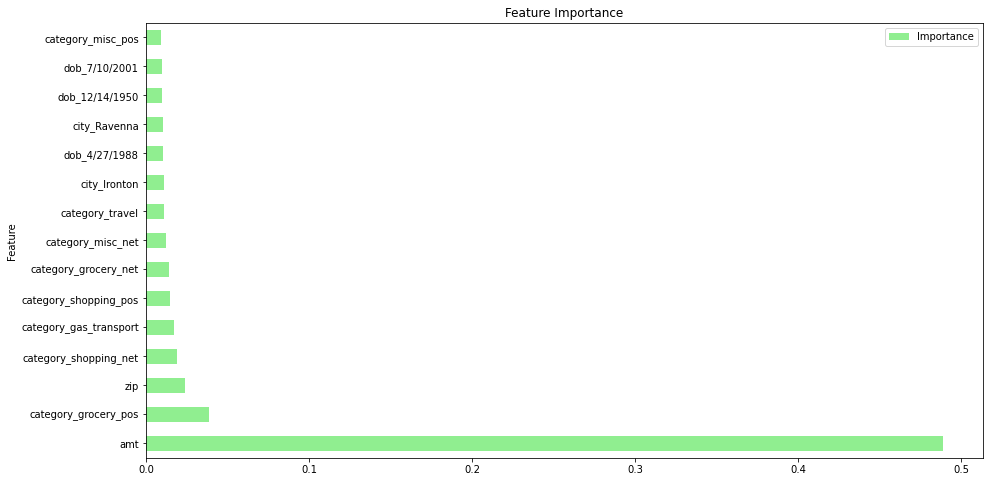

In [114]:
# Plot the top 15 most important features
importances_df[0:15].plot(
    figsize= (15,8),
    kind='barh', 
    color='lightgreen', 
    title= 'Feature Importance', 
    legend=True)

In [115]:
importances_df.head()

,Importance
Feature,
amt,0.488918
category_grocery_pos,0.038479
zip,0.024062
category_shopping_net,0.018752
category_gas_transport,0.017008
